In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
train = train.dropna(axis=1, how='all')

test = pd.read_csv('data/test.csv')
test = test.dropna(axis=1, how='all')

data = pd.date_range('10/1/2012', periods=len(train) + len(test), freq='d')

In [3]:
len(data)

531

In [4]:
train["Day"] = data[:len(train)]
test["Day"] = data[len(train):]

In [5]:
train.head()

,sessions,Day
0,500,2012-10-01
1,1339,2012-10-02
2,1462,2012-10-03
3,1702,2012-10-04
4,1656,2012-10-05


In [6]:
total = pd.concat([train, test])
len(total)

531

[]

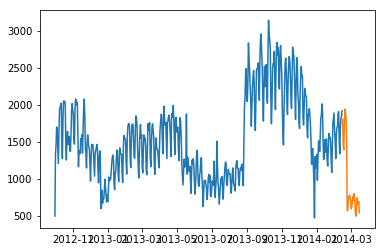

In [7]:
plt.plot(train.Day, train.sessions)
plt.plot()

plt.plot(test.Day, test.sessions)
plt.plot()

[]

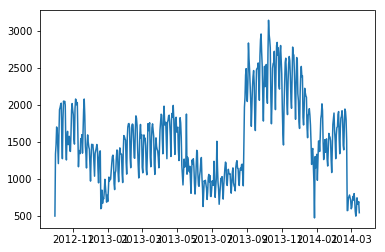

In [8]:
plt.plot(total.Day, total.sessions)
plt.plot()

In [9]:

total = total[["Day","sessions"]]
total.index = total.Day
total = total.drop('Day', 1)

In [10]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.sessions, autolag='AIC')
    print('dftest')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).mean()
/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).std()


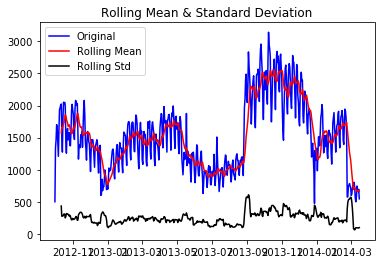

Results of Dickey-Fuller Test:
dftest
Test Statistic                  -1.766357
p-value                          0.397288
#Lags Used                      16.000000
Number of Observations Used    514.000000
Critical Value (10%)            -2.569774
Critical Value (5%)             -2.867179
Critical Value (1%)             -3.443136
dtype: float64


In [11]:

test_stationarity(total)

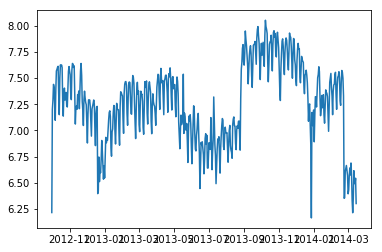

In [12]:
ts_log = np.log(total)
plt.plot(ts_log)

/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).mean()
  if __name__ == '__main__':


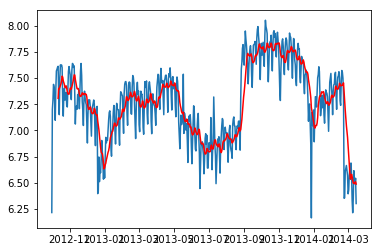

In [13]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [14]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

,sessions
Day,
2012-10-01,NaN
2012-10-02,NaN
2012-10-03,NaN
2012-10-04,NaN
2012-10-05,NaN
2012-10-06,NaN
2012-10-07,NaN
2012-10-08,NaN
2012-10-09,NaN


/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).mean()
/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).std()


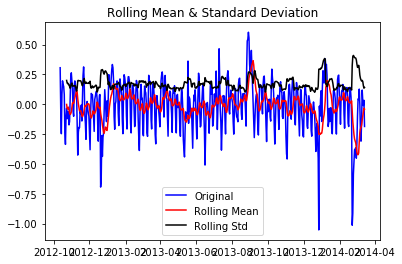

Results of Dickey-Fuller Test:
dftest
Test Statistic                  -3.954455
p-value                          0.001669
#Lags Used                      19.000000
Number of Observations Used    500.000000
Critical Value (10%)            -2.569858
Critical Value (5%)             -2.867338
Critical Value (1%)             -3.443496
dtype: float64


In [15]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)
# Stationary because test statistic < critical value at 5%

/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(adjust=True,ignore_na=False,min_periods=0,halflife=12).mean()
  if __name__ == '__main__':


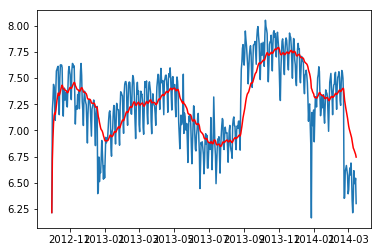

In [16]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).mean()
/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).std()


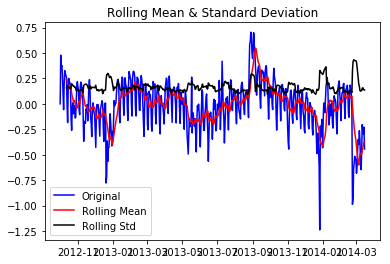

Results of Dickey-Fuller Test:
dftest
Test Statistic                  -2.374560
p-value                          0.149046
#Lags Used                      19.000000
Number of Observations Used    511.000000
Critical Value (10%)            -2.569791
Critical Value (5%)             -2.867213
Critical Value (1%)             -3.443212
dtype: float64


In [17]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

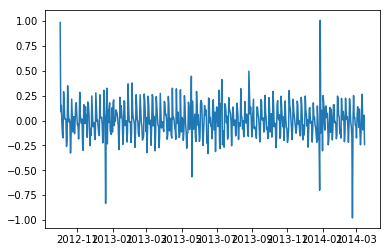

In [18]:
# First order differencing
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).mean()
/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).std()


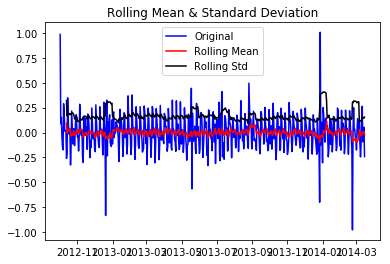

Results of Dickey-Fuller Test:
dftest
Test Statistic                -6.704682e+00
p-value                        3.811483e-09
#Lags Used                     1.900000e+01
Number of Observations Used    5.100000e+02
Critical Value (10%)          -2.569797e+00
Critical Value (5%)           -2.867224e+00
Critical Value (1%)           -3.443237e+00
dtype: float64


In [19]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)
# This seems to have reduced variation a lot

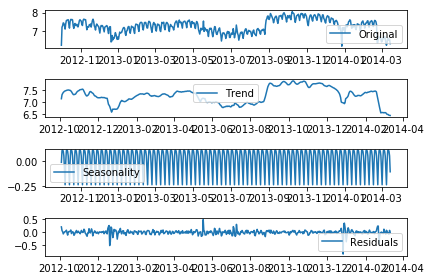

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).mean()
/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).std()


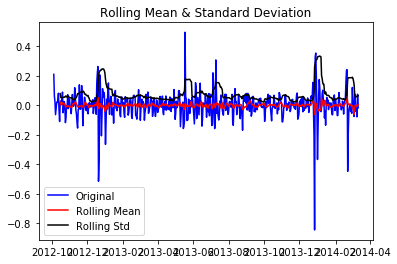

Results of Dickey-Fuller Test:
dftest
Test Statistic                -9.823741e+00
p-value                        5.254345e-17
#Lags Used                     1.900000e+01
Number of Observations Used    5.050000e+02
Critical Value (10%)          -2.569827e+00
Critical Value (5%)           -2.867280e+00
Critical Value (1%)           -3.443366e+00
dtype: float64


In [21]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [22]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [23]:
lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

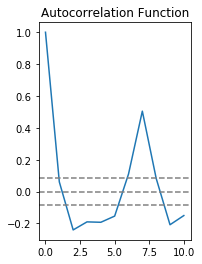

In [24]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

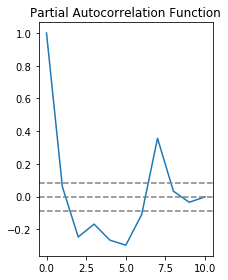

In [25]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [26]:
from statsmodels.tsa.arima_model import ARIMA

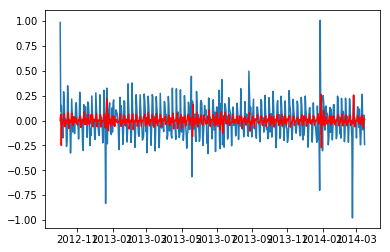

In [27]:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

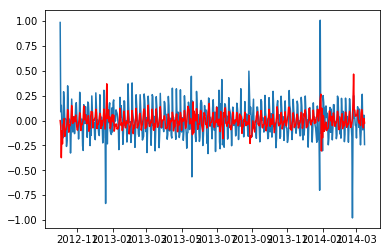

In [28]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


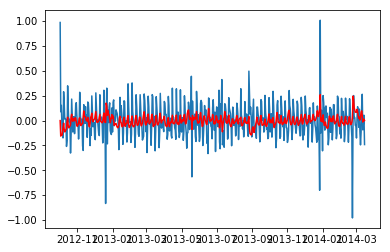

In [37]:
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [38]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Day
2012-10-02   -0.000948
2012-10-03   -0.156479
2012-10-04   -0.144322
2012-10-05   -0.149910
2012-10-06   -0.121312
dtype: float64


In [39]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Day
2012-10-02   -0.000948
2012-10-03   -0.157427
2012-10-04   -0.301750
2012-10-05   -0.451660
2012-10-06   -0.572972
dtype: float64

In [48]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

NotImplementedError: fill_value 0 not supported

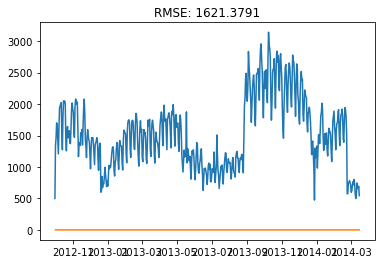

In [44]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(total)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum(diff**2)/len(total)))

In [42]:
pred_ARIMA = pd.DataFrame(predictions_ARIMA).values
pred_ARIMA

array([[        nan],
       [ 0.99905241],
       [ 0.85433887],
       [ 0.73952311],
       [ 0.63657073],
       [ 0.5638474 ],
       [ 0.52351659],
       [ 0.50987345],
       [ 0.46783602],
       [ 0.41712324],
       [ 0.37634663],
       [ 0.34262654],
       [ 0.31501802],
       [ 0.31054522],
       [ 0.32098983],
       [ 0.30506903],
       [ 0.28338736],
       [ 0.26649201],
       [ 0.25181459],
       [ 0.24099974],
       [ 0.24988565],
       [ 0.26599099],
       [ 0.26725971],
       [ 0.26507361],
       [ 0.27013879],
       [ 0.27214462],
       [ 0.27159165],
       [ 0.27934625],
       [ 0.28661335],
       [ 0.28245247],
       [ 0.26756539],
       [ 0.25243749],
       [ 0.24234023],
       [ 0.23555064],
       [ 0.23971517],
       [ 0.24629145],
       [ 0.23620032],
       [ 0.22445733],
       [ 0.21505977],
       [ 0.20853138],
       [ 0.20224617],
       [ 0.20870185],
       [ 0.22972896],
       [ 0.2407372 ],
       [ 0.24991984],
       [ 0

In [43]:
diff = np.array(pred_ARIMA - np.matrix(total.sessions.values).T)
diff[0] = 0

In [ ]:
pred_ARIMA.shape

In [ ]:
(pred_ARIMA - np.matrix(total.sessions.values).T)

In [50]:
pd.Series(ts_log.ix[:,0], index=ts_log.index)

Day
2012-10-01    6.214608
2012-10-02    7.199678
2012-10-03    7.287561
2012-10-04    7.439559
2012-10-05    7.412160
2012-10-06    7.271704
2012-10-07    7.096721
2012-10-08    7.385851
2012-10-09    7.567863
2012-10-10    7.582738
2012-10-11    7.602401
2012-10-12    7.612337
2012-10-13    7.351800
2012-10-14    7.149917
2012-10-15    7.498316
2012-10-16    7.626083
2012-10-17    7.612831
2012-10-18    7.625107
2012-10-19    7.599902
2012-10-20    7.273093
2012-10-21    7.136483
2012-10-22    7.351800
2012-10-23    7.404279
2012-10-24    7.288928
2012-10-25    7.327123
2012-10-26    7.362645
2012-10-27    7.230563
2012-10-28    7.224025
2012-10-29    7.383989
2012-10-30    7.563201
                ...   
2014-02-14    7.499977
2014-02-15    7.282074
2014-02-16    7.239215
2014-02-17    7.457609
2014-02-18    7.572503
2014-02-19    7.555382
2014-02-20    7.497762
2014-02-21    7.329750
2014-02-22    6.350886
2014-02-23    6.356108
2014-02-24    6.606650
2014-02-25    6.633318
2014-02